# Simulation of Complex Systems - Chapter 13
**Author**: Artur Gasparyan

In [2]:
import numpy as np
import matplotlib.pyplot as plt

seed = 69420
rng = np.random.default_rng(seed)

## Exercise 13.1

In [83]:
# Betray = 0
# Cooperate = 1

# 0,0 -> P,P
# 0,1 -> T,S
# 1,0 -> S,T
# 1,1 -> R,R

T = 0
R = 0.5
P = 1
S = 1.5

outcomes = np.array([
    [[P, P], [T, S]],
    [[S, T], [R, R]]
])

In [84]:
N = 10

In [85]:
years_all = np.zeros((N, N, N, 2))

for n in range(N):
    for m in range(N):
        d1 = np.ones(N, dtype=int)
        d2 = np.ones(N, dtype=int)
        if n < m:
            d1[n:] = 0
            d2[n+1:] = 0
        elif n > m:
            d1[m+1:] = 0
            d2[m:] = 0
        else:
            d1[m:]= 0
            d2[m:]= 0
        
        outcome = outcomes[d1, d2]
        years_all[n, m, :, :] = outcome

In [86]:
years = years_all[:, 6, :, 0]
acc_years = np.sum(years, axis=1)

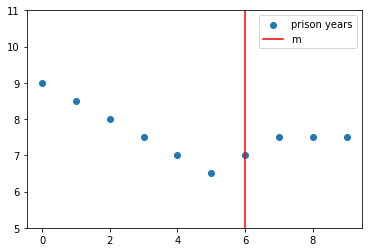

In [87]:
fig = plt.figure()
ax = fig.gca()
ax.scatter(np.arange(N), acc_years)
ax.axvline(6, c='red')
ax.set_ylim(5, 11)
ax.legend(["prison years", "m"])

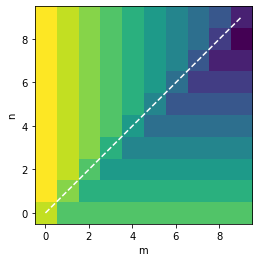

In [102]:
years = years_all[:, :, :, 0]
acc_years = np.sum(years, axis=2)
fig = plt.figure()
ax = fig.gca()
ax.imshow(acc_years, origin='lower')
ax.set_xlabel('m')
ax.set_ylabel('n')
ax.plot(np.arange(1, N+1)-1, np.arange(N), linestyle='--', c='white')
